<a href="https://colab.research.google.com/github/tomaskurtenperez/MLrepo/blob/main/DeptosBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/ColabNotebooks/DeptosBA

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ColabNotebooks/DeptosBA


In [54]:
import pandas
from matplotlib import pyplot as plt
import pickle

df = pandas.read_excel('MI_DAP_AX15.xlsx', sheet_name='Hoja 1')

In [55]:
df2=df
df2['Mes'] = df2['Mes'].replace(["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"], ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])
df2['date']=df2['Año'].astype(str) +"-"+ df2['Mes'].astype(str).str.zfill(2)
df2.head()

,Año,Mes,1 ambiente,2 ambientes,3 ambientes,date
0,2010,March,1235.334356,1724.560281,2820.006455,2010-March
1,2010,April,1252.288364,1740.976294,2799.481104,2010-April
2,2010,May,1297.599782,1760.306485,2852.037016,2010-May
3,2010,June,1318.126641,1747.756155,2896.893207,2010-June
4,2010,July,1314.677617,1775.973651,2918.323720,2010-July


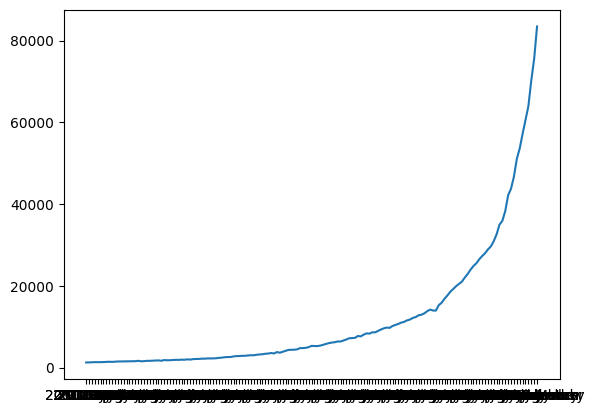

In [56]:
df3=df2
df3['DATE'] = df2['date']
df3.head()
plt.plot(df3['DATE'], df3['1 ambiente'])
plt.show()

In [57]:
df3 = df3[['DATE', '1 ambiente']] 
df3.dropna(inplace=True)
df3.columns = ['ds', 'y'] 
df3.tail()

<ipython-input-57-6b8b405c9b68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


,ds,y
152,2022-November,60544.510861
153,2022-December,63948.282976
154,2023-January,70217.960745
155,2023-February,75537.774522
156,2023-March,83455.381470


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprothp33u/47zpn2ek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprothp33u/1d3pu5bb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7127', 'data', 'file=/tmp/tmprothp33u/47zpn2ek.json', 'init=/tmp/tmprothp33u/1d3pu5bb.json', 'output', 'file=/tmp/tmprothp33u/prophet_model0ykrod6l/prophet_model-20230520045923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:59:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


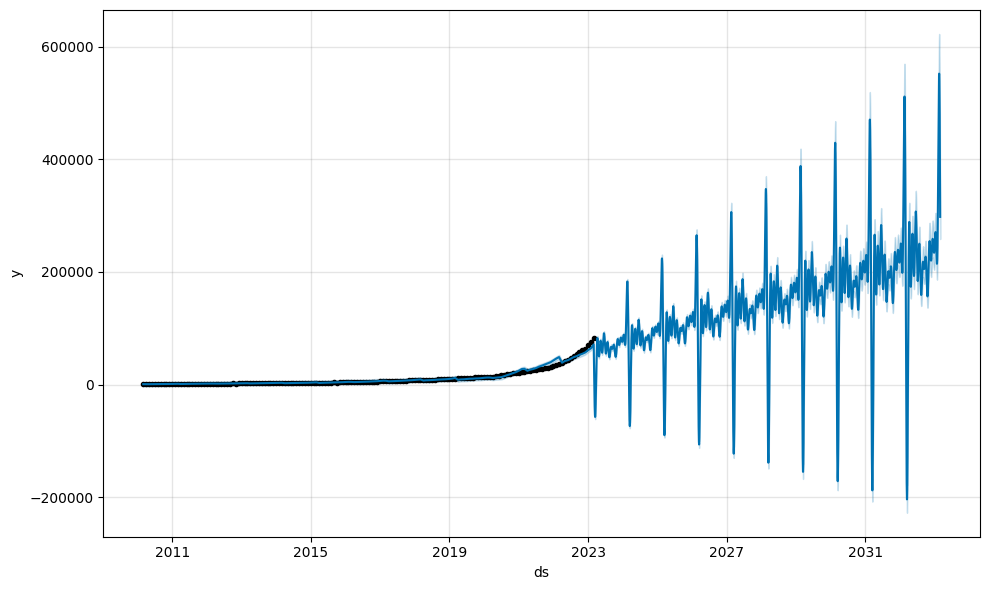

In [58]:
from prophet import Prophet

m = Prophet(seasonality_mode='multiplicative').fit(df3)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprothp33u/qs4225g1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprothp33u/9z8gqtzj.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:Command ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'info']
	error during processing Machine is not on the network
04:59:30 - cmdstanpy - INFO - CmdStan installation /usr/local/lib/python3.10/dist-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
INFO:cmdstanpy:CmdStan installation /usr/local/lib/python3.10/dist-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
04:59:30 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
I

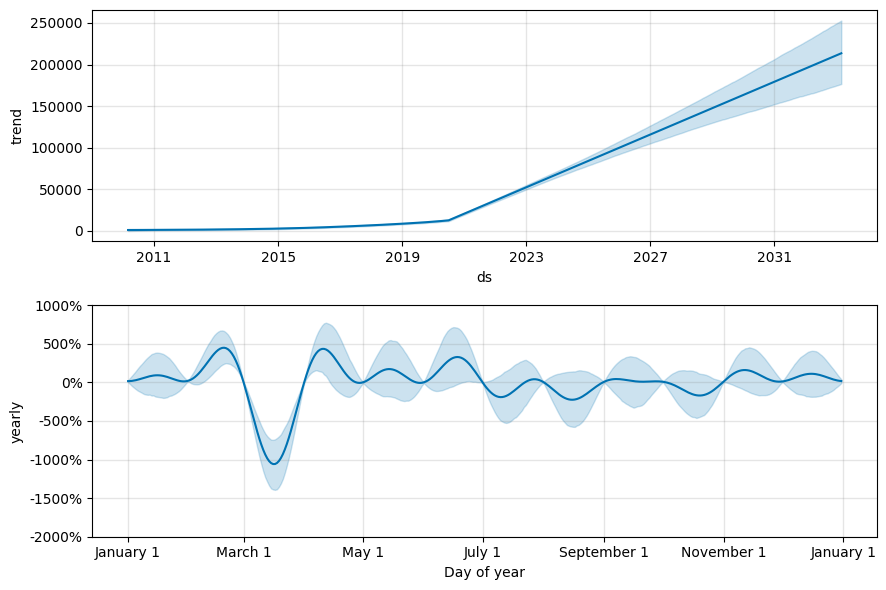

In [59]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(df3, show_progress=False)
fcst = m.predict(future)
fig = m.plot_components(fcst)

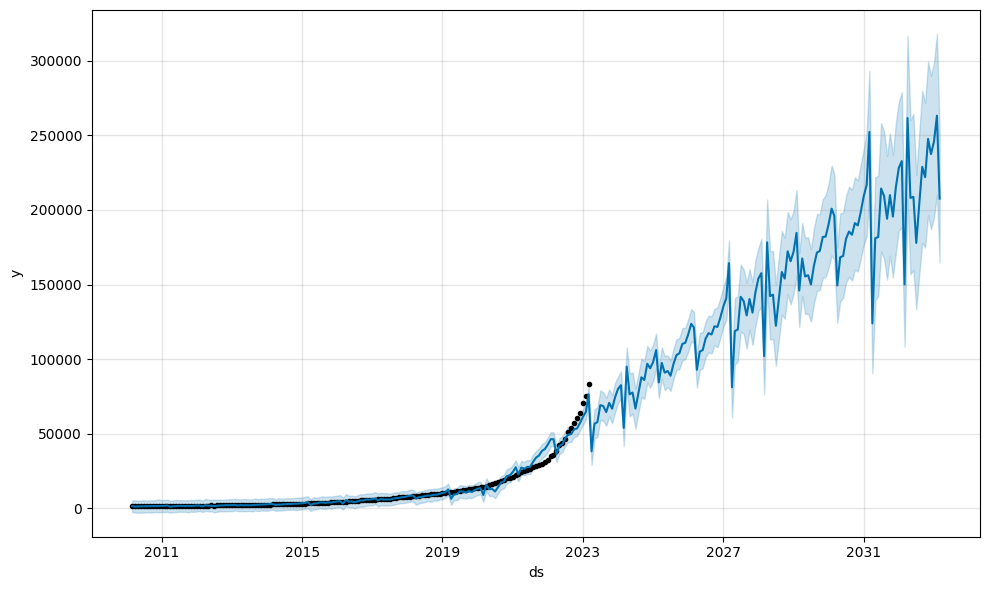

In [60]:
future = m.make_future_dataframe(periods=120, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

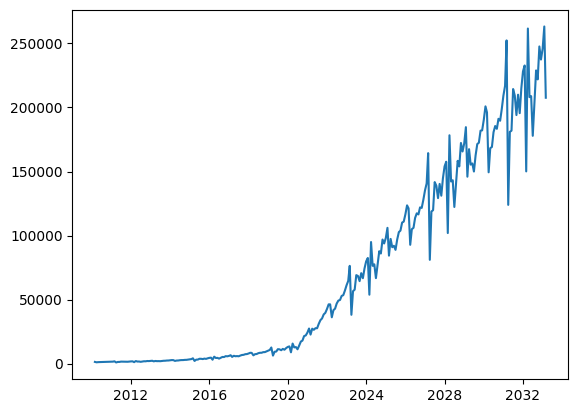

In [61]:
plt.plot(fcst['ds'], fcst['yhat'])
plt.show()